<a href="https://colab.research.google.com/github/aSafarpoor/OSN_FAD/blob/main/CLS/Heeb/Twitter_Dataset_analysis_%2B_seperated_subgraphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import numpy as np
import networkx as nx
from tqdm import tqdm
import matplotlib.pyplot as plt
import random

In [4]:
with open("test.txt", "r") as file:
    # Read the first two lines and strip any newline characters
    line1 = file.readline().strip()
    line2 = file.readline().strip()

    # Split the lines into lists of integers
    btest = list(map(int, line1.split()))
    stest = list(map(int, line2.split()))

# Print the lists to verify
print("List 1 B: ", len(btest))
print("List 2 S: ", len(stest))

List 1 B:  158377
List 2 S:  81263


In [5]:
with open("train.txt", "r") as file:
    # Read the first two lines and strip any newline characters
    line1 = file.readline().strip()
    line2 = file.readline().strip()

    # Split the lines into lists of integers
    btrain = list(map(int, line1.split()))
    strain = list(map(int, line2.split()))

# Print the lists to verify
print("List 1 B: ", len(btrain))
print("List 2 S: ", len(strain))

List 1 B:  20000
List 2 S:  10000


In [ ]:
with open("test_full.txt", "r") as file:
    # Read the first two lines and strip any newline characters
    line1 = file.readline().strip()
    line2 = file.readline().strip()

    # Split the lines into lists of integers
    bfull = list(map(int, line1.split()))
    sfull = list(map(int, line2.split()))

# Print the lists to verify
print("List 1 B: ", len(bfull))
print("List 2 S: ", len(sfull))

List 1 B:  178377
List 2 S:  91263


In [6]:
with open("graph.txt", "r") as file:
    edges = [list(map(int, line.strip().split())) for line in file]

print("Graph Data:", len(edges))

Graph Data: 6818501


In [7]:
edges = np.array(edges)

In [ ]:
nodes1 = btrain+strain+btest+stest
print(len(nodes1))
nodes1 = list(set(nodes1))
print(len(nodes1))


269640
269640


In [ ]:
nodes2 = list(set(list(edges.reshape(-1))))
len(nodes2)

269640

In [8]:
G = nx.Graph()
G.add_edges_from(edges)

# train subgraph

In [ ]:
train_nodes = btrain+strain

In [ ]:
H = G.subgraph(train_nodes).copy()

In [ ]:
degree_dict = dict(H.degree())

In [ ]:
sybils = strain
print(len(sybils))

benigns = btrain
print(len(benigns))

10000
20000


100%|██████████| 20000/20000 [00:00<00:00, 1444269.83it/s]


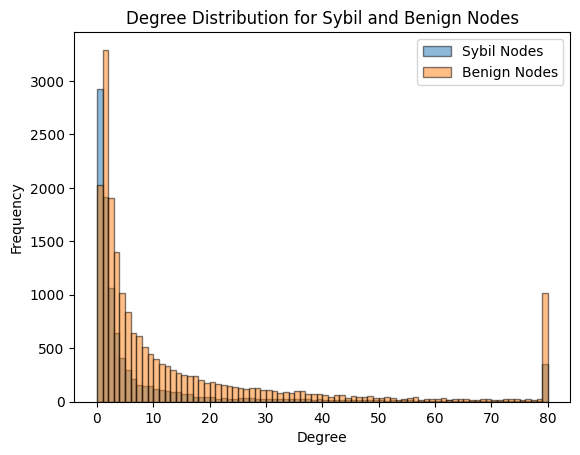

In [ ]:
sdegree_list = [min(degree_dict[node], 80) for node in tqdm(sybils) if node in degree_dict]
bdegree_list = [min(degree_dict[node], 80) for node in tqdm(benigns) if node in degree_dict]


# Plot the histograms
plt.hist(sdegree_list, bins=range(min(sdegree_list + bdegree_list), max(sdegree_list + bdegree_list) + 1),
         alpha=0.5, label='Sybil Nodes', edgecolor='black')
plt.hist(bdegree_list, bins=range(min(sdegree_list + bdegree_list), max(sdegree_list + bdegree_list) + 1),
         alpha=0.5, label='Benign Nodes', edgecolor='black')

# Add labels and legend
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("Degree Distribution for Sybil and Benign Nodes")
plt.legend()

# Show the plot
plt.show()

100%|██████████| 20000/20000 [00:00<00:00, 1455900.59it/s]


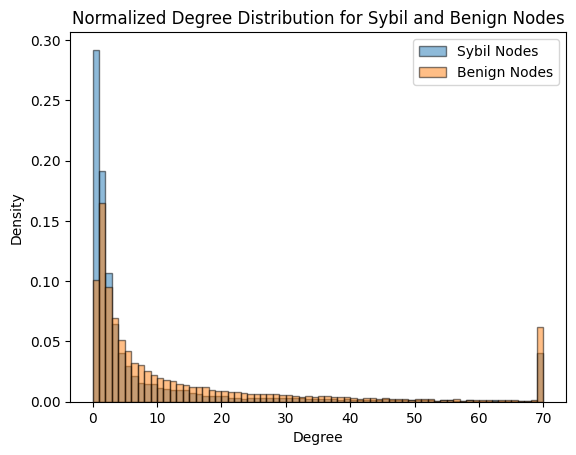

In [ ]:
sdegree_list = [min(degree_dict[node], 70) for node in tqdm(sybils) if node in degree_dict]
bdegree_list = [min(degree_dict[node], 70) for node in tqdm(benigns) if node in degree_dict]

# Define the bins
bins = range(min(sdegree_list + bdegree_list), max(sdegree_list + bdegree_list) + 1)

# Plot the normalized histograms
plt.hist(sdegree_list, bins=bins, alpha=0.5, label='Sybil Nodes', edgecolor='black', density=True)
plt.hist(bdegree_list, bins=bins, alpha=0.5, label='Benign Nodes', edgecolor='black', density=True)

# Add labels and legend
plt.xlabel("Degree")
plt.ylabel("Density")
plt.title("Normalized Degree Distribution for Sybil and Benign Nodes")
plt.legend()

# Show the plot
plt.show()


In [ ]:
sdegree_list = [degree_dict[node] for node in tqdm(sybils)]
bdegree_list = [degree_dict[node] for node in tqdm(benigns)]

# Calculate average degrees
sdegree_avg = sum(sdegree_list) / len(sdegree_list)
bdegree_avg = sum(bdegree_list) / len(bdegree_list)

print("\nAverage degree for sybils:", sdegree_avg)
print("Average degree for benigns:", bdegree_avg)


100%|██████████| 20000/20000 [00:00<00:00, 2102197.27it/s]


Average degree for sybils: 12.4529
Average degree for benigns: 21.00435


In [ ]:
max_degree = max(dict(H.degree()).values())
max_degree

3832

In [ ]:
def less_than_x(x,sdegree_list,bdegree_list):

    sdegree_less_than_x = sum(1 for degree in sdegree_list if degree <= x) / len(sdegree_list) * 100
    bdegree_less_than_x = sum(1 for degree in bdegree_list if degree <= x) / len(bdegree_list) * 100

    # Print the results
    # print(f"Percentage of sybil nodes with degree less than or equal to {x}: {sdegree_less_than_x:.2f}%")
    # print(f"Percentage of benign nodes with degree less than or equal to {x}: {bdegree_less_than_x:.2f}%")

    return sdegree_less_than_x,bdegree_less_than_x

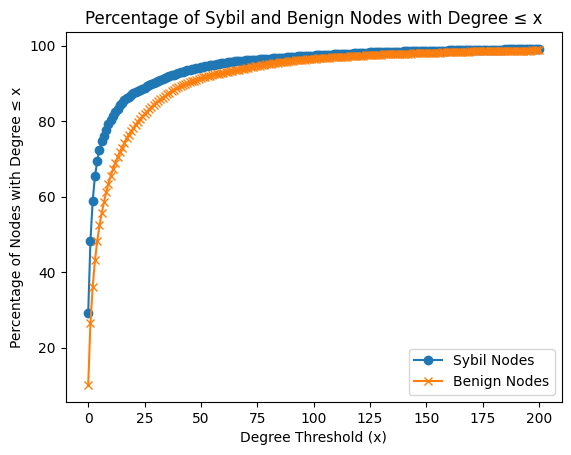

In [ ]:
x_values = list(range(200+1))
sdegree_percentages = []
bdegree_percentages = []

for x in x_values:
    s_percent, b_percent = less_than_x(x, sdegree_list, bdegree_list)
    sdegree_percentages.append(s_percent)
    bdegree_percentages.append(b_percent)

# Plot the results
plt.plot(x_values, sdegree_percentages, marker='o', label='Sybil Nodes')
plt.plot(x_values, bdegree_percentages, marker='x', label='Benign Nodes')

# Add labels, title, and legend
plt.xlabel("Degree Threshold (x)")
plt.ylabel("Percentage of Nodes with Degree ≤ x")
plt.title("Percentage of Sybil and Benign Nodes with Degree ≤ x")
plt.legend()

# Show the plot
plt.show()

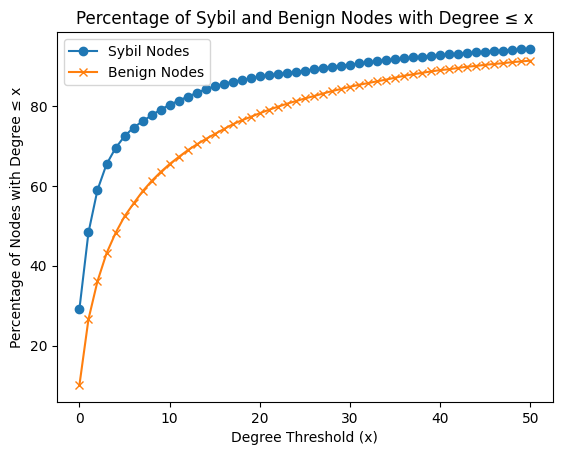

In [ ]:
x_values = list(range(50+1))
sdegree_percentages = []
bdegree_percentages = []

for x in x_values:
    s_percent, b_percent = less_than_x(x, sdegree_list, bdegree_list)
    sdegree_percentages.append(s_percent)
    bdegree_percentages.append(b_percent)

# Plot the results
plt.plot(x_values, sdegree_percentages, marker='o', label='Sybil Nodes')
plt.plot(x_values, bdegree_percentages, marker='x', label='Benign Nodes')

# Add labels, title, and legend
plt.xlabel("Degree Threshold (x)")
plt.ylabel("Percentage of Nodes with Degree ≤ x")
plt.title("Percentage of Sybil and Benign Nodes with Degree ≤ x")
plt.legend()

# Show the plot
plt.show()

# test subgraph

In [ ]:
test_nodes = btest+stest

In [ ]:
H = G.subgraph(test_nodes).copy()

In [ ]:
degree_dict = dict(H.degree())

In [ ]:
sybils = stest
print(len(sybils))

benigns = btest
print(len(benigns))

81263
158377


100%|██████████| 158377/158377 [00:00<00:00, 579174.99it/s]


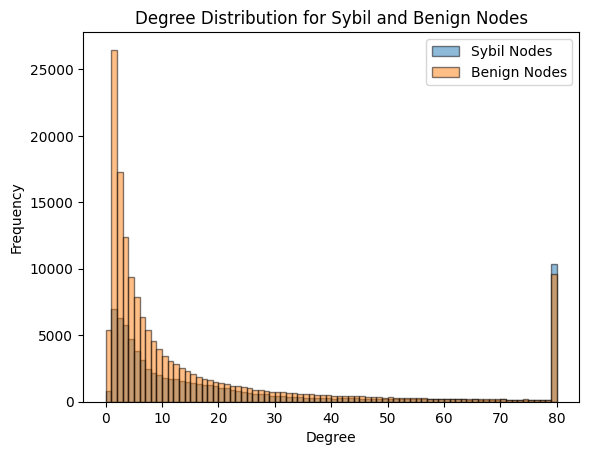

In [ ]:
sdegree_list = [min(degree_dict[node], 80) for node in tqdm(sybils) if node in degree_dict]
bdegree_list = [min(degree_dict[node], 80) for node in tqdm(benigns) if node in degree_dict]


# Plot the histograms
plt.hist(sdegree_list, bins=range(min(sdegree_list + bdegree_list), max(sdegree_list + bdegree_list) + 1),
         alpha=0.5, label='Sybil Nodes', edgecolor='black')
plt.hist(bdegree_list, bins=range(min(sdegree_list + bdegree_list), max(sdegree_list + bdegree_list) + 1),
         alpha=0.5, label='Benign Nodes', edgecolor='black')

# Add labels and legend
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("Degree Distribution for Sybil and Benign Nodes")
plt.legend()

# Show the plot
plt.show()

100%|██████████| 158377/158377 [00:00<00:00, 1007670.04it/s]


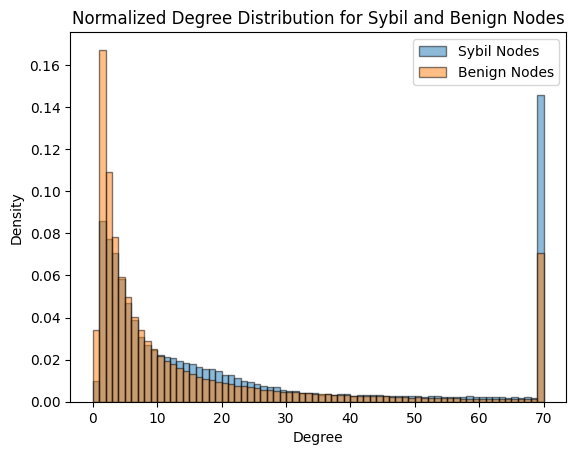

In [ ]:
sdegree_list = [min(degree_dict[node], 70) for node in tqdm(sybils) if node in degree_dict]
bdegree_list = [min(degree_dict[node], 70) for node in tqdm(benigns) if node in degree_dict]

# Define the bins
bins = range(min(sdegree_list + bdegree_list), max(sdegree_list + bdegree_list) + 1)

# Plot the normalized histograms
plt.hist(sdegree_list, bins=bins, alpha=0.5, label='Sybil Nodes', edgecolor='black', density=True)
plt.hist(bdegree_list, bins=bins, alpha=0.5, label='Benign Nodes', edgecolor='black', density=True)

# Add labels and legend
plt.xlabel("Degree")
plt.ylabel("Density")
plt.title("Normalized Degree Distribution for Sybil and Benign Nodes")
plt.legend()

# Show the plot
plt.show()


In [ ]:
sdegree_list = [degree_dict[node] for node in tqdm(sybils)]
bdegree_list = [degree_dict[node] for node in tqdm(benigns)]

# Calculate average degrees
sdegree_avg = sum(sdegree_list) / len(sdegree_list)
bdegree_avg = sum(bdegree_list) / len(bdegree_list)

print("\nAverage degree for sybils:", sdegree_avg)
print("Average degree for benigns:", bdegree_avg)


100%|██████████| 158377/158377 [00:00<00:00, 1368450.15it/s]


Average degree for sybils: 33.59398496240601
Average degree for benigns: 24.171060191820782


In [ ]:
max_degree = max(dict(H.degree()).values())
max_degree

11903

In [ ]:
def less_than_x(x,sdegree_list,bdegree_list):

    sdegree_less_than_x = sum(1 for degree in sdegree_list if degree <= x) / len(sdegree_list) * 100
    bdegree_less_than_x = sum(1 for degree in bdegree_list if degree <= x) / len(bdegree_list) * 100

    # Print the results
    # print(f"Percentage of sybil nodes with degree less than or equal to {x}: {sdegree_less_than_x:.2f}%")
    # print(f"Percentage of benign nodes with degree less than or equal to {x}: {bdegree_less_than_x:.2f}%")

    return sdegree_less_than_x,bdegree_less_than_x

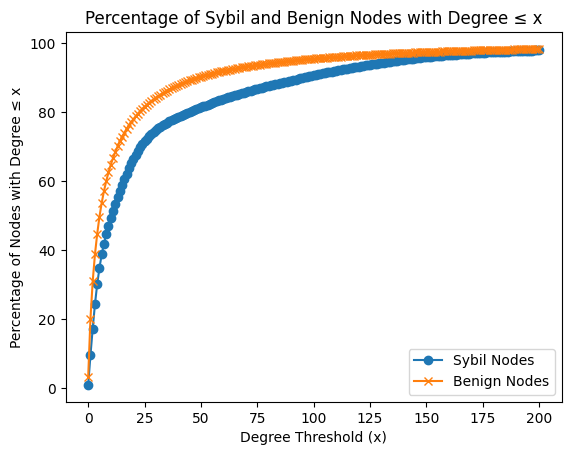

In [ ]:
x_values = list(range(200+1))
sdegree_percentages = []
bdegree_percentages = []

for x in x_values:
    s_percent, b_percent = less_than_x(x, sdegree_list, bdegree_list)
    sdegree_percentages.append(s_percent)
    bdegree_percentages.append(b_percent)

# Plot the results
plt.plot(x_values, sdegree_percentages, marker='o', label='Sybil Nodes')
plt.plot(x_values, bdegree_percentages, marker='x', label='Benign Nodes')

# Add labels, title, and legend
plt.xlabel("Degree Threshold (x)")
plt.ylabel("Percentage of Nodes with Degree ≤ x")
plt.title("Percentage of Sybil and Benign Nodes with Degree ≤ x")
plt.legend()

# Show the plot
plt.show()

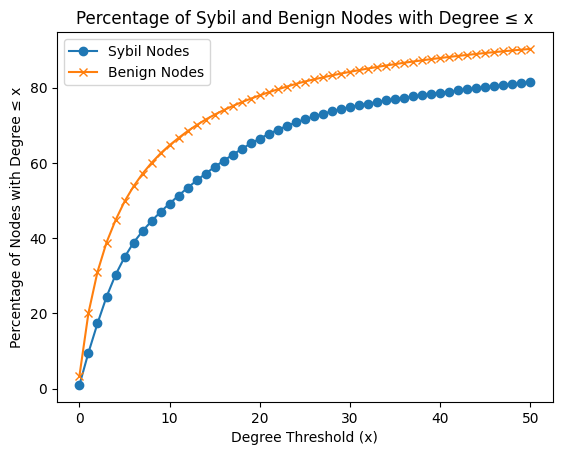

In [ ]:
x_values = list(range(50+1))
sdegree_percentages = []
bdegree_percentages = []

for x in x_values:
    s_percent, b_percent = less_than_x(x, sdegree_list, bdegree_list)
    sdegree_percentages.append(s_percent)
    bdegree_percentages.append(b_percent)

# Plot the results
plt.plot(x_values, sdegree_percentages, marker='o', label='Sybil Nodes')
plt.plot(x_values, bdegree_percentages, marker='x', label='Benign Nodes')

# Add labels, title, and legend
plt.xlabel("Degree Threshold (x)")
plt.ylabel("Percentage of Nodes with Degree ≤ x")
plt.title("Percentage of Sybil and Benign Nodes with Degree ≤ x")
plt.legend()

# Show the plot
plt.show()

# whats going on in sybil region

In [9]:
nodes = strain+stest

In [10]:
H = G.subgraph(nodes).copy()

In [11]:
degree_dict = dict(H.degree())

100%|██████████| 91263/91263 [00:00<00:00, 1271511.64it/s]


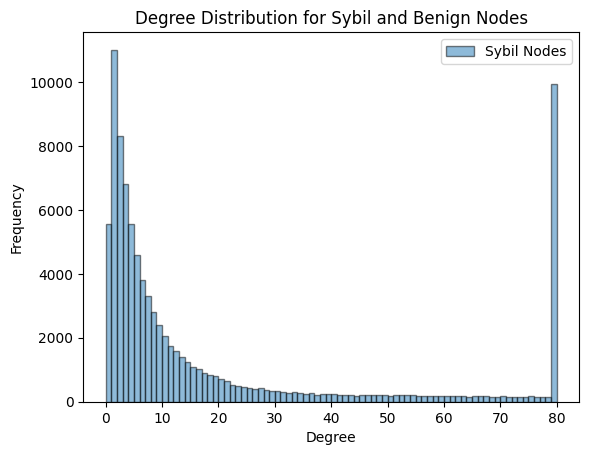

In [15]:
sdegree_list = [min(degree_dict[node], 80) for node in tqdm(nodes) if node in degree_dict]



# Plot the histograms
plt.hist(sdegree_list, bins=range(min(sdegree_list), max(sdegree_list) + 1),
         alpha=0.5, label='Sybil Nodes', edgecolor='black')


# Add labels and legend
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("Degree Distribution for Sybil and Benign Nodes")
plt.legend()

# Show the plot
plt.show()

In [16]:
def less_than_x(x,sdegree_list):

    sdegree_less_than_x = sum(1 for degree in sdegree_list if degree <= x) / len(sdegree_list) * 100

    # Print the results
    # print(f"Percentage of sybil nodes with degree less than or equal to {x}: {sdegree_less_than_x:.2f}%")
    # print(f"Percentage of benign nodes with degree less than or equal to {x}: {bdegree_less_than_x:.2f}%")

    return sdegree_less_than_x

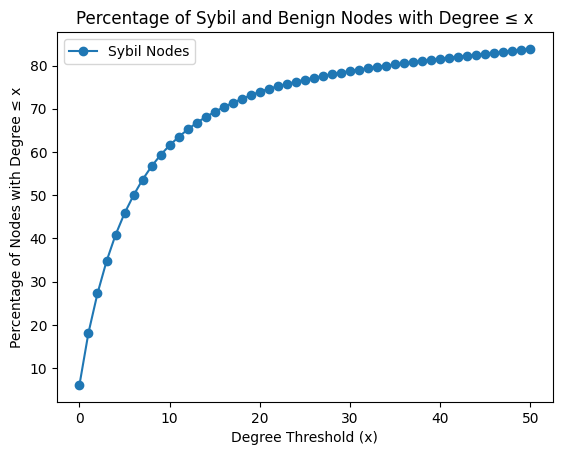

In [19]:
x_values = list(range(50+1))
sdegree_percentages = []
bdegree_percentages = []

for x in x_values:
    s_percent = less_than_x(x, sdegree_list)
    sdegree_percentages.append(s_percent)

# Plot the results
plt.plot(x_values, sdegree_percentages, marker='o', label='Sybil Nodes')

# Add labels, title, and legend
plt.xlabel("Degree Threshold (x)")
plt.ylabel("Percentage of Nodes with Degree ≤ x")
plt.title("Percentage of Sybil and Benign Nodes with Degree ≤ x")
plt.legend()

# Show the plot
plt.show()

# just stest

In [20]:
nodes = stest

In [21]:
H = G.subgraph(nodes).copy()

In [22]:
degree_dict = dict(H.degree())

100%|██████████| 81263/81263 [00:00<00:00, 842379.05it/s]


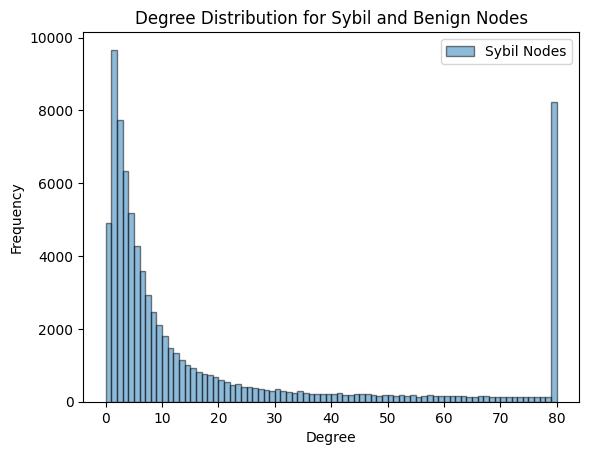

In [23]:
sdegree_list = [min(degree_dict[node], 80) for node in tqdm(nodes) if node in degree_dict]



# Plot the histograms
plt.hist(sdegree_list, bins=range(min(sdegree_list), max(sdegree_list) + 1),
         alpha=0.5, label='Sybil Nodes', edgecolor='black')


# Add labels and legend
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("Degree Distribution for Sybil and Benign Nodes")
plt.legend()

# Show the plot
plt.show()

In [24]:
def less_than_x(x,sdegree_list):

    sdegree_less_than_x = sum(1 for degree in sdegree_list if degree <= x) / len(sdegree_list) * 100

    # Print the results
    # print(f"Percentage of sybil nodes with degree less than or equal to {x}: {sdegree_less_than_x:.2f}%")
    # print(f"Percentage of benign nodes with degree less than or equal to {x}: {bdegree_less_than_x:.2f}%")

    return sdegree_less_than_x

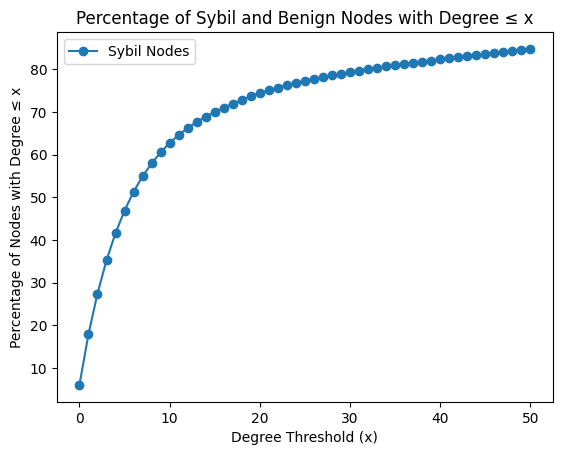

In [25]:
x_values = list(range(50+1))
sdegree_percentages = []
bdegree_percentages = []

for x in x_values:
    s_percent = less_than_x(x, sdegree_list)
    sdegree_percentages.append(s_percent)

# Plot the results
plt.plot(x_values, sdegree_percentages, marker='o', label='Sybil Nodes')

# Add labels, title, and legend
plt.xlabel("Degree Threshold (x)")
plt.ylabel("Percentage of Nodes with Degree ≤ x")
plt.title("Percentage of Sybil and Benign Nodes with Degree ≤ x")
plt.legend()

# Show the plot
plt.show()

In [27]:
len(nodes)

81263

In [36]:
average_degree = sum(dict(H.degree()).values()) / H.number_of_nodes()
average_degree

25.937782262530302

In [37]:
max(dict(H.degree()).values())

1952

In [38]:
d = list(dict(H.degree()).values())
d.sort()

In [44]:
print(d[::2000])

[0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 4, 4, 5, 5, 5, 6, 7, 7, 8, 9, 10, 11, 13, 15, 17, 20, 23, 29, 36, 46, 57, 70, 86, 104, 128, 185]


In [50]:
components_info = [
    {
        "num_nodes": len(comp),
        "average_degree": sum(dict(H.subgraph(comp).degree()).values()) / len(comp)
    }
    for comp in nx.connected_components(H)
]

num_components = len(components_info)

isolated_node_counter_or_small_component = 0
for i, info in enumerate(components_info, 1):
    if info['average_degree'] <10 :
        isolated_node_counter_or_small_component += 1
    else:
        print(f"Component {i}: Number of Nodes = {info['num_nodes']}, Average Degree = {info['average_degree']:.2f}")

print("isolated_node_counter_or_small_component: ",isolated_node_counter_or_small_component)
print("Total Number of Connected Components:", num_components)

Component 1: Number of Nodes = 75793, Average Degree = 27.80
isolated_node_counter_or_small_component:  5155
Total Number of Connected Components: 5156


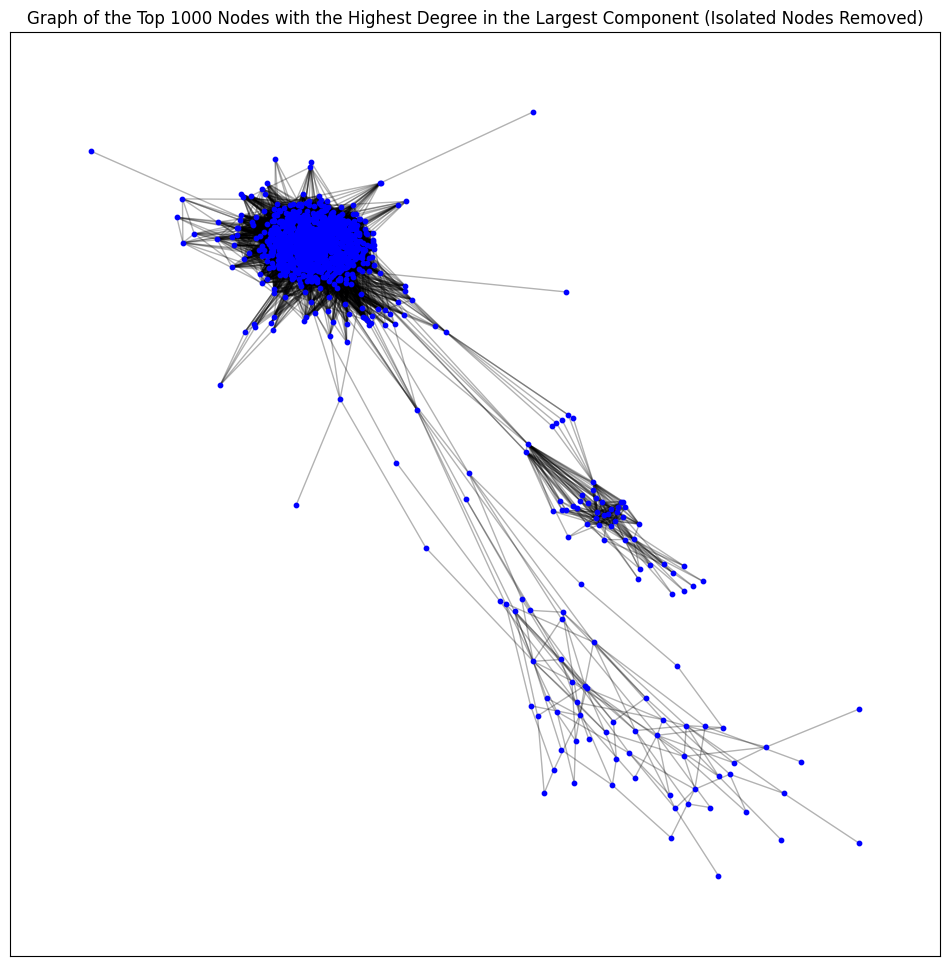

In [53]:
largest_cc = max(nx.connected_components(H), key=len)
G_largest_cc = H.subgraph(largest_cc).copy()

# Step 2: Find the 1000 nodes with the highest degree in this component
top_nodes = sorted(G_largest_cc.degree, key=lambda x: x[1], reverse=True)[:1000]
top_nodes = [node for node, degree in top_nodes]

# Step 3: Create a subgraph with the selected top nodes and make a copy to allow modifications
G_top_subgraph = G_largest_cc.subgraph(top_nodes).copy()

# Step 4: Remove isolated nodes (nodes with degree 0)
isolated_nodes = list(nx.isolates(G_top_subgraph))
G_top_subgraph.remove_nodes_from(isolated_nodes)

# Step 5: Plot the subgraph
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G_top_subgraph, seed=42)  # Layout for visualization
nx.draw_networkx_nodes(G_top_subgraph, pos, node_size=10, node_color='blue')
nx.draw_networkx_edges(G_top_subgraph, pos, alpha=0.3)
plt.title("Graph of the Top 1000 Nodes with the Highest Degree in the Largest Component (Isolated Nodes Removed)")
plt.show()

Iteration 1: Average Degree of the Subgraph = 32.24


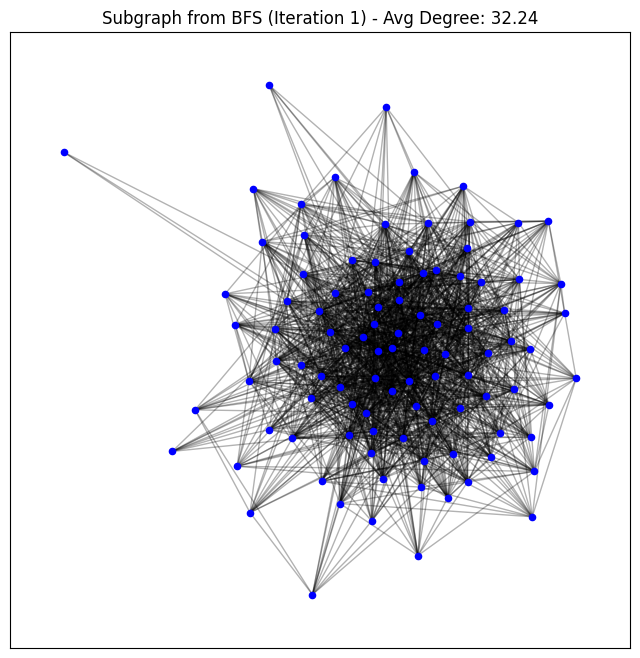

Iteration 2: Average Degree of the Subgraph = 32.82


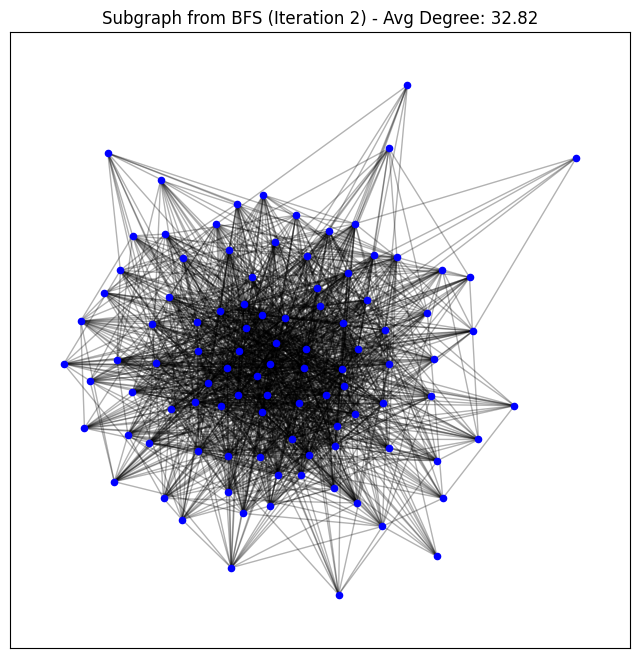

Iteration 3: Average Degree of the Subgraph = 34.20


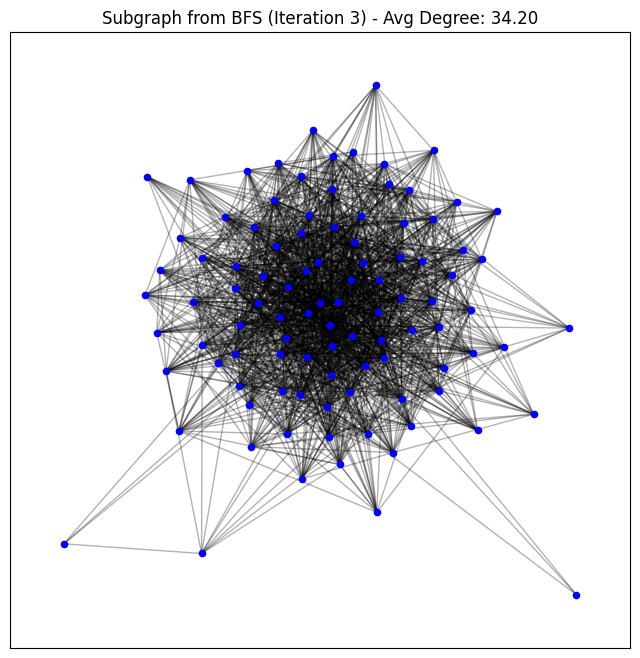

Iteration 4: Average Degree of the Subgraph = 28.70


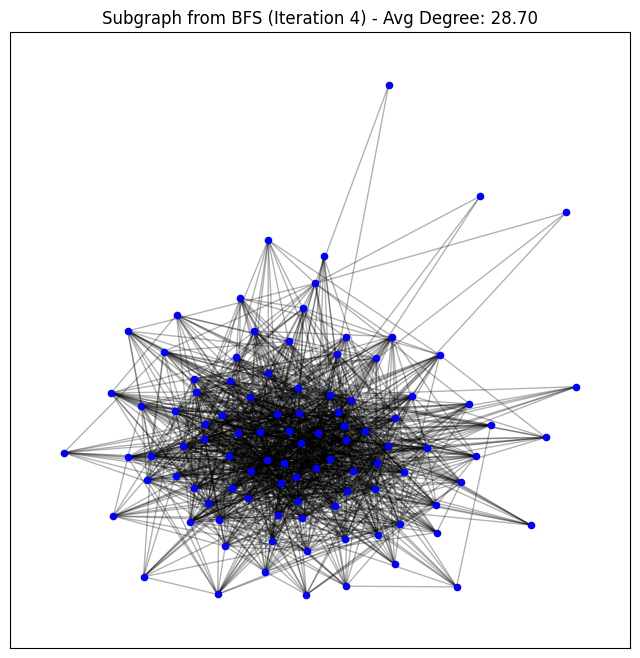

Iteration 5: Average Degree of the Subgraph = 28.70


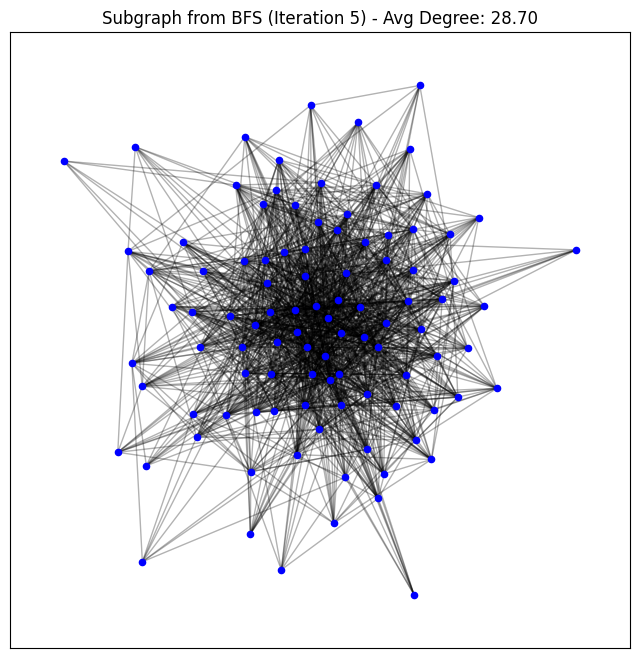

In [56]:
for i in range(5):
    # Step 1: Select a random node from the final graph
    start_node = random.choice(list(G_top_subgraph.nodes))

    # Step 2: Run BFS until we reach 100 nodes
    bfs_nodes = list(nx.bfs_edges(G_top_subgraph, start_node))
    bfs_nodes_flat = [start_node] + [v for u, v in bfs_nodes]  # Include starting node and other nodes in the BFS tree

    # Limit to 100 nodes if BFS returns more
    bfs_nodes_flat = bfs_nodes_flat[:100]

    # Step 3: Create subgraph from BFS nodes
    bfs_subgraph = G_top_subgraph.subgraph(bfs_nodes_flat)

    # Step 4: Calculate and print the average degree
    avg_degree = np.mean([degree for _, degree in bfs_subgraph.degree()])
    print(f"Iteration {i+1}: Average Degree of the Subgraph = {avg_degree:.2f}")

    # Step 5: Draw the subgraph
    plt.figure(figsize=(8, 8))
    pos = nx.spring_layout(bfs_subgraph, seed=42)
    nx.draw_networkx_nodes(bfs_subgraph, pos, node_size=20, node_color='blue')
    nx.draw_networkx_edges(bfs_subgraph, pos, alpha=0.3)
    plt.title(f"Subgraph from BFS (Iteration {i+1}) - Avg Degree: {avg_degree:.2f}")
    plt.show()

In [57]:
for i in range(25):
    # Step 1: Select a random node from the final graph
    start_node = random.choice(list(G_top_subgraph.nodes))

    # Step 2: Run BFS until we reach 100 nodes
    bfs_nodes = list(nx.bfs_edges(G_top_subgraph, start_node))
    bfs_nodes_flat = [start_node] + [v for u, v in bfs_nodes]  # Include starting node and other nodes in the BFS tree

    # Limit to 100 nodes if BFS returns more
    bfs_nodes_flat = bfs_nodes_flat[:100]

    # Step 3: Create subgraph from BFS nodes
    bfs_subgraph = G_top_subgraph.subgraph(bfs_nodes_flat)

    # Step 4: Calculate and print the average degree
    avg_degree = np.mean([degree for _, degree in bfs_subgraph.degree()])
    print(f"Iteration {i+1}: Average Degree of the Subgraph = {avg_degree:.2f}")

    # # Step 5: Draw the subgraph
    # plt.figure(figsize=(8, 8))
    # pos = nx.spring_layout(bfs_subgraph, seed=42)
    # nx.draw_networkx_nodes(bfs_subgraph, pos, node_size=20, node_color='blue')
    # nx.draw_networkx_edges(bfs_subgraph, pos, alpha=0.3)
    # plt.title(f"Subgraph from BFS (Iteration {i+1}) - Avg Degree: {avg_degree:.2f}")
    # plt.show()

Iteration 1: Average Degree of the Subgraph = 36.64
Iteration 2: Average Degree of the Subgraph = 34.88
Iteration 3: Average Degree of the Subgraph = 27.24
Iteration 4: Average Degree of the Subgraph = 26.94
Iteration 5: Average Degree of the Subgraph = 30.04
Iteration 6: Average Degree of the Subgraph = 5.96
Iteration 7: Average Degree of the Subgraph = 34.50
Iteration 8: Average Degree of the Subgraph = 8.70
Iteration 9: Average Degree of the Subgraph = 19.22
Iteration 10: Average Degree of the Subgraph = 32.50
Iteration 11: Average Degree of the Subgraph = 27.48
Iteration 12: Average Degree of the Subgraph = 34.86
Iteration 13: Average Degree of the Subgraph = 37.48
Iteration 14: Average Degree of the Subgraph = 27.76
Iteration 15: Average Degree of the Subgraph = 32.42
Iteration 16: Average Degree of the Subgraph = 30.20
Iteration 17: Average Degree of the Subgraph = 32.52
Iteration 18: Average Degree of the Subgraph = 31.96
Iteration 19: Average Degree of the Subgraph = 35.36
Iter